In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('EMOTIONS_results.csv')

df.loc[df["feature selector"]=="InfoGain", "feature selector"] = "Mutual Info"
df.loc[df["feature selector"]=="pearson", "feature selector"] = "Corr. Pearson"
df.loc[df["feature selector"]=="spearman", "feature selector"] = "Corr. Spearman"
df.loc[df["modelo"]=="LogReg", "modelo"] = "Reg. Logística"
df.loc[df["modelo"]=="XGB", "modelo"] = "XGBoost"
df.loc[df["modelo"]=="NeuralNet", "modelo"] = "R. Neural (MLP)"

df

,accuracy,params,duration,modelo,feature selector,k
0,0.855074,"22,6,2",0 days 00:00:00.064057,KNN,OneR,1
1,0.895418,"16,7,1",0 days 00:00:00.088079,KNN,OneR,10
2,0.961061,"16,4,1",0 days 00:00:00.315289,KNN,OneR,100
3,0.962486,"18,3,1",0 days 00:00:04.317914,KNN,OneR,1100
4,0.965766,"16,4,1",0 days 00:00:05.203718,KNN,OneR,1300
...,...,...,...,...,...,...
877,0.943290,"2.276979169911779e-07,gbtree,5.853661423806021...",0 days 00:00:05.343926,XGBoost,Corr. Spearman,50
878,0.987804,"0.0006197228908386,dart,3.1259111028807565e-08,3",0 days 00:01:39.745416,XGBoost,Corr. Spearman,500
879,0.987334,"0.0004557161997143,dart,0.07596358900301,3",0 days 00:02:23.070513,XGBoost,Corr. Spearman,700
880,0.955463,"0.0946936293053337,gbtree,0.0853303265401022,3",0 days 00:00:06.385933,XGBoost,Corr. Spearman,75


In [16]:
aux = df.sort_values(by=['k', 'accuracy'], ascending=[True, False])
aux = aux.drop(columns=["params", "duration"])

#  aux.loc[aux.modelo!="XGB", "modelo"] = "Outros"
#  aux = aux.groupby(["modelo", "feature selector", "k"]).agg({'accuracy' : 'max'})
aux = aux.groupby(["modelo", "k"]).agg({'accuracy' : 'max'})
aux = aux.reset_index()

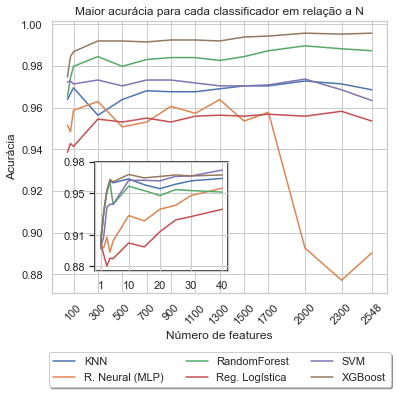

In [17]:
from matplotlib import rcParams
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

k_lim = 50

rcParams['figure.figsize'] = 6,5
sns.set_theme(style="whitegrid")

xticks = [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 2000, 2300, 2548]


ax = sns.lineplot(
        data = aux[aux.k>=k_lim],     
        x = aux[aux.k>=k_lim].k, 
        y= 'accuracy',
        hue = 'modelo',
    )

ax.grid()
ax.set_xticks(xticks)
ax.tick_params(axis='x', rotation=45)
# ax.set_yticks([.91, .92, .93, .94, .95, .96, .97, .98, .99, 1])

ax.set(
    title='Maior acurácia para cada classificador em relação a N',
#     ylim=(0.3, 1.0), 
    ylabel='Acurácia', 
    xlabel='Número de features')

loc, borderpad = ("lower left", 3) #if model != "RandomForest" else ("lower left", 2)
# axins = inset_axes(ax, 
#                    "36%", "40%", 
#                    loc=loc, 
#                    borderpad=borderpad,
#                    bbox_to_anchor=(0.5,1-0.3,.3,.3)
#                   )

axins = inset_axes(ax, 
                   "100%", "100%", 
                   loc=loc, 
#                    borderpad=borderpad,
                   bbox_to_anchor=(0.11, 0.06,.4,.4),
                   bbox_transform=ax.transAxes
                  )


sns.lineplot(
    data = aux[aux.k<k_lim],     
    x = aux[aux.k<k_lim].k, 
    y = 'accuracy',
    hue = 'modelo',
    ax = axins,
    markers = True,
)

axins.set(ylabel=None, xlabel=None)
axins.set_xticks([1, 10, 20, 30, 40])
axins.set_yticks([.88, .91,  .95, .98])
axins.yaxis.tick_left()
axins.patch.set_edgecolor('black')  
axins.patch.set_linewidth('1.5')
axins.yaxis.set_label_position("left")

hue = 'modelo'
ax.grid()
# ax.legend(loc=6, bbox_to_anchor=(1,0.8))
axins.get_legend().remove()

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=3)


# plt.yticks()
# ax.locator_params(axis='y', nbins=26)


In [18]:
ax.figure.savefig(f"imgs/maior_acc_por_classif.png", bbox_inches='tight', dpi=80)

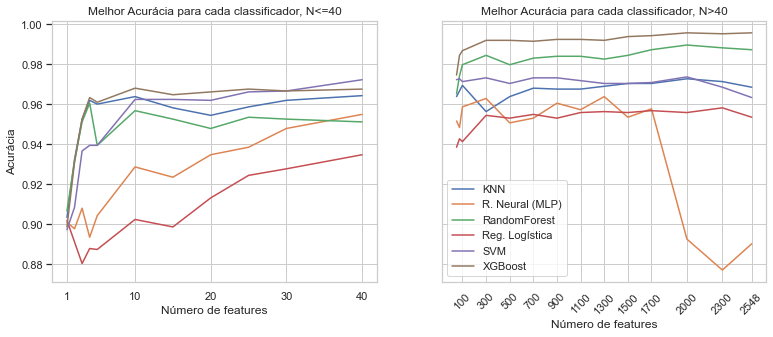

In [7]:
f, axs = plt.subplots(1, 2, figsize=(2*6.4, 4.8), sharey=True)

rcParams['figure.figsize'] = 6,5
sns.set_theme(style="whitegrid")

xticks = [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 2000, 2300, 2548]

axs[0] = sns.lineplot(
    data = aux[aux.k<k_lim],     
    x = aux[aux.k<k_lim].k, 
    y = 'accuracy',
    hue = 'modelo',
    ax = axs[0],
    markers = True,
)

axs[0].set(ylabel=None, xlabel=None)
axs[0].set_xticks([1, 10, 20, 30, 40])
axs[0].set_yticks([.88, .90, .92, .94, .96, .98, 1])
axs[0].yaxis.tick_left()

axs[1] = sns.lineplot(
        data = aux[aux.k>=k_lim],     
        x = aux[aux.k>=k_lim].k, 
        y= 'accuracy',
        hue = 'modelo',
        ax = axs[1]
    )

axs[1].grid()
axs[1].set_xticks(xticks)
axs[1].tick_params(axis='x', rotation=45)
# ax.set_yticks([.91, .92, .93, .94, .95, .96, .97, .98, .99, 1])

axs[0].set(
    title='Melhor Acurácia para cada classificador, N<=40',
    ylabel='Acurácia', 
    xlabel='Número de features')

axs[1].set(
    title='Melhor Acurácia para cada classificador, N>40',
    ylabel='Acurácia', 
    xlabel='Número de features')



hue = 'modelo'
axs[1].grid()
axs[1].legend()
axs[0].get_legend().remove()

# plt.yticks()
# ax.locator_params(axis='y', nbins=26)


In [9]:
f.savefig(f"imgs/maior_acc_por_classif_ladoalado.png", bbox_inches='tight', dpi=80)

In [22]:
df[(df.modelo=="XGBoost") & (df.k==1)].sort_values(by='accuracy', ascending=False)

,accuracy,params,duration,modelo,feature selector,k
260,0.898689,"0.9573042727847222,gbtree,0.6485106350226797,3",0 days 00:00:00.690627,XGBoost,PCA,1
125,0.851792,"0.7515769459676706,gbtree,2.633568082706581e-06,3",0 days 00:00:00.579525,XGBoost,OneR,1
407,0.787059,"0.000104867284843,gbtree,2.4401000493755543e-06,3",0 days 00:00:00.630573,XGBoost,ANOVA,1
707,0.687291,"0.007462104072308,dart,0.0119491931938021,3",0 days 00:00:01.049467,XGBoost,Corr. Pearson,1
857,0.661446,"0.0350059064717523,gbtree,0.0316011640504561,3",0 days 00:00:00.624568,XGBoost,Corr. Spearman,1
557,0.347560,"2.459928932749005e-07,gbtree,0.0516486201359292,8",0 days 00:00:01.465331,XGBoost,Mutual Info,1


In [23]:
df[(df.modelo=="XGBoost") & (df.k==2)].sort_values(by='accuracy', ascending=False)

,accuracy,params,duration,modelo,feature selector,k
268,0.931053,"3.5188483328675496e-07,gbtree,0.814841690048452,4",0 days 00:00:00.832757,XGBoost,PCA,2
133,0.865860,"0.9771842634317888,dart,0.0106658393498256,3",0 days 00:00:01.033937,XGBoost,OneR,2
415,0.777212,"0.684544038917389,dart,2.040472450839929e-07,3",0 days 00:00:01.035452,XGBoost,ANOVA,2
715,0.722888,"0.618496765393844,dart,1.0479422043292165e-08,3",0 days 00:00:01.063987,XGBoost,Corr. Pearson,2
865,0.708343,"0.0025969776650439,gbtree,2.211913248404355e-07,3",0 days 00:00:00.681620,XGBoost,Corr. Spearman,2
565,0.351317,"0.0109985082648237,dart,4.018225131159984e-06,9",0 days 00:00:03.578126,XGBoost,Mutual Info,2


In [24]:
df[(df.modelo=="XGBoost") & (df.k==40)].sort_values(by='accuracy', ascending=False)

,accuracy,params,duration,modelo,feature selector,k
275,0.967640,"0.0794009634345662,dart,9.884953698374686e-07,3",0 days 00:00:03.428125,XGBoost,PCA,40
425,0.965308,"4.933445689341473e-05,dart,1.5608359237674162e...",0 days 00:00:02.671940,XGBoost,ANOVA,40
575,0.961072,"1.4460508131213145e-07,gbtree,0.04093397625879...",0 days 00:01:38.352184,XGBoost,Mutual Info,40
143,0.959666,"0.0007674934900021,dart,0.8331299988763678,4",0 days 00:00:01.750095,XGBoost,OneR,40
725,0.958257,"0.0028533956345472,gbtree,2.669740106571729e-07,4",0 days 00:00:03.862888,XGBoost,Corr. Pearson,40
875,0.932033,"0.0127611019813882,gbtree,1.975673234918816e-06,4",0 days 00:00:03.946039,XGBoost,Corr. Spearman,40
